In [2]:
# This project analyzes data related to football games and explores patterns, trends, and correlations.
# The code uses pandas, numpy, matplotlib, and seaborn libraries for data manipulation and visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
epl_df = pd.read_csv("EPL_20_21.csv")

# Display the first 5 rows of the dataset
epl_df.head(5)

# Display the information about the dataset
epl_df.info()

# Perform descriptive statistics on the dataset
epl_df.describe()

# Check for null values in the dataset
epl_df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [3]:
# Create two new columns: Minpermatch and Goalpermatch
epl_df['Minpermatch'] = epl_df['Mins'] / epl_df['Matches'].astype(int)
epl_df['Goalpermatch'] = epl_df['Goals'] / epl_df['Matches'].astype(float)

# Calculate the total number of goals
Total_goals = epl_df['Goals'].sum()

# Calculate the total number of penalty goals
Total_penalty_goals = epl_df['Penalty_Goals'].sum()

# Calculate the total number of penalty attempts
Total_penalty_attempts = epl_df['Penalty_Attempted'].sum()



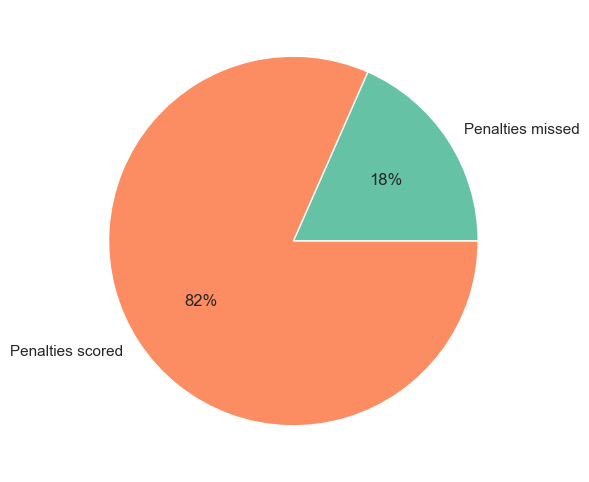

In [4]:
# Create a pie chart to visualize penalties missed vs scored
plt.figure(figsize=(13, 6))
Pl_not_scored = Total_penalty_attempts - Total_penalty_goals
data = [Pl_not_scored, Total_penalty_goals]
labels = ['Penalties missed', 'Penalties scored']
colors = sns.color_palette('Set2')
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()



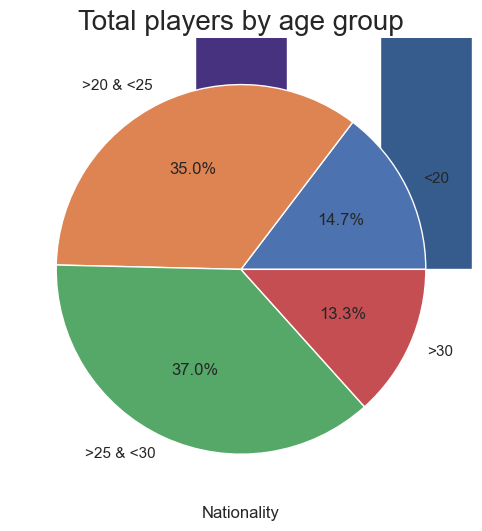

In [5]:
# Get the unique positions in the dataset
epl_df['Position'].unique()

# Filter the dataset for forward players
epl_df[epl_df['Position'] == 'FW']

# Get the number of players from different nations
num_nationalities = np.size(epl_df['Nationality'].unique())

# Create a bar plot to show the count of players from each country
nationality = epl_df.groupby('Nationality').size().sort_values(ascending=False)
nationality.head(10).plot(kind='bar', figsize=(12, 6), color=sns.color_palette("magma"))

# Create a bar plot to show the clubs with the maximum number of players in their squad
epl_df['Club'].value_counts().nlargest(5).plot(kind='bar', color=sns.color_palette('viridis'))

# Create a bar plot to show the clubs with the least number of players in their squad
epl_df['Club'].value_counts().nsmallest(5).plot(kind='bar', color=sns.color_palette('viridis'))

# Group players into different age groups
under20 = epl_df[epl_df['Age'] <= 20]
age20_25 = epl_df[(epl_df['Age'] > 20) & (epl_df['Age'] <= 25)]
age25_30 = epl_df[(epl_df['Age'] > 25) & (epl_df['Age'] <= 30)]
above_30 = epl_df[epl_df['Age'] > 30]

# Create a pie chart to visualize the distribution of players across different age groups
x = np.array([under20['Name'].count(), age20_25['Name'].count(), age25_30['Name'].count(), above_30['Name'].count()])
mylabels = ['<20', '>20 & <25', '>25 & <30', '>30']
plt.title('Total players by age group', fontsize=20)
plt.pie(x, labels=mylabels, autopct='%.1f%%')
plt.show()



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

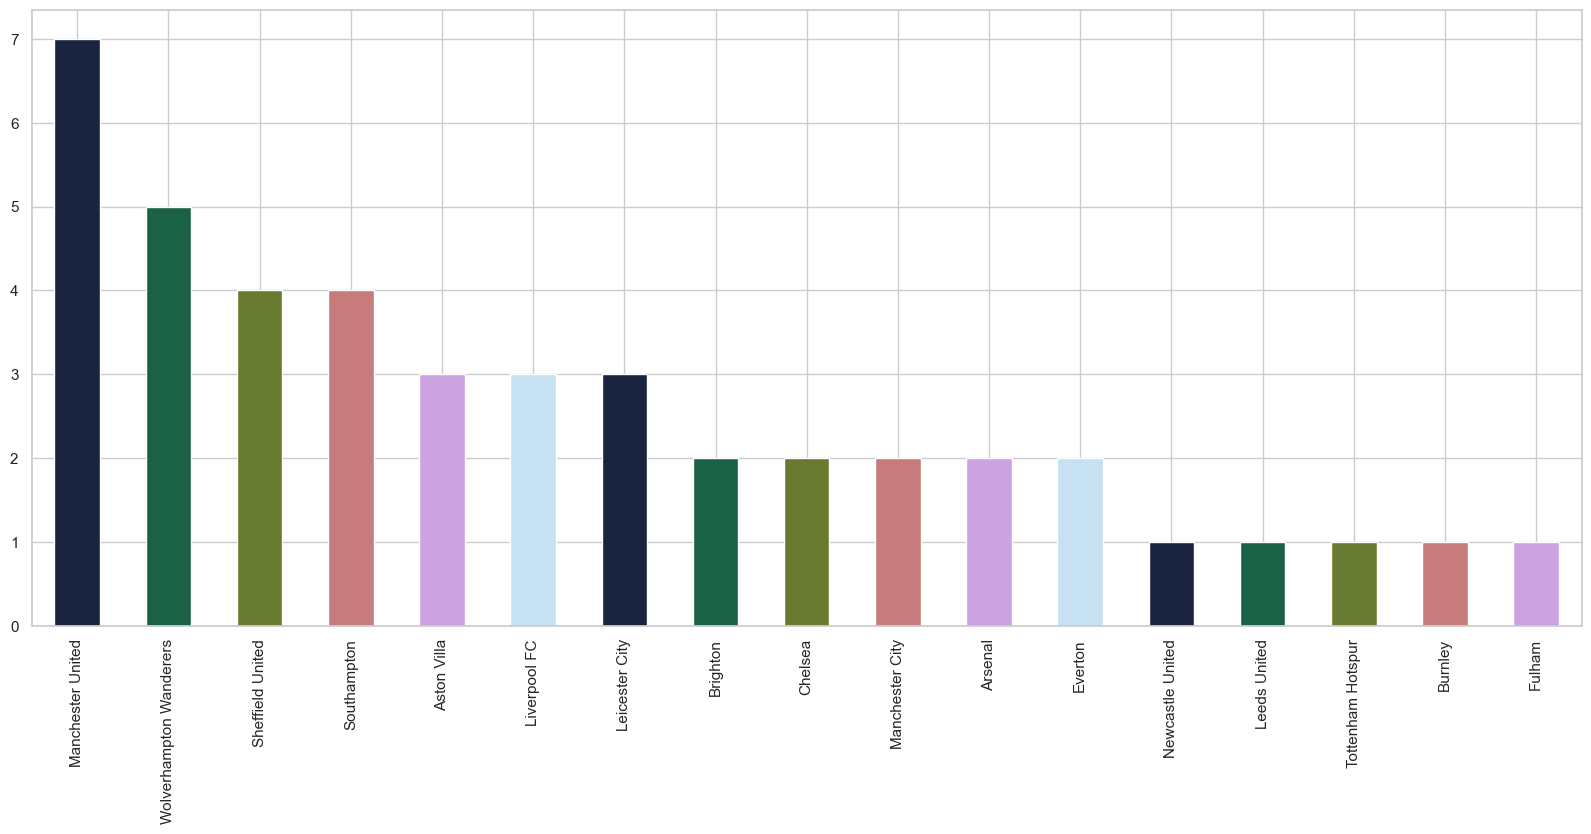

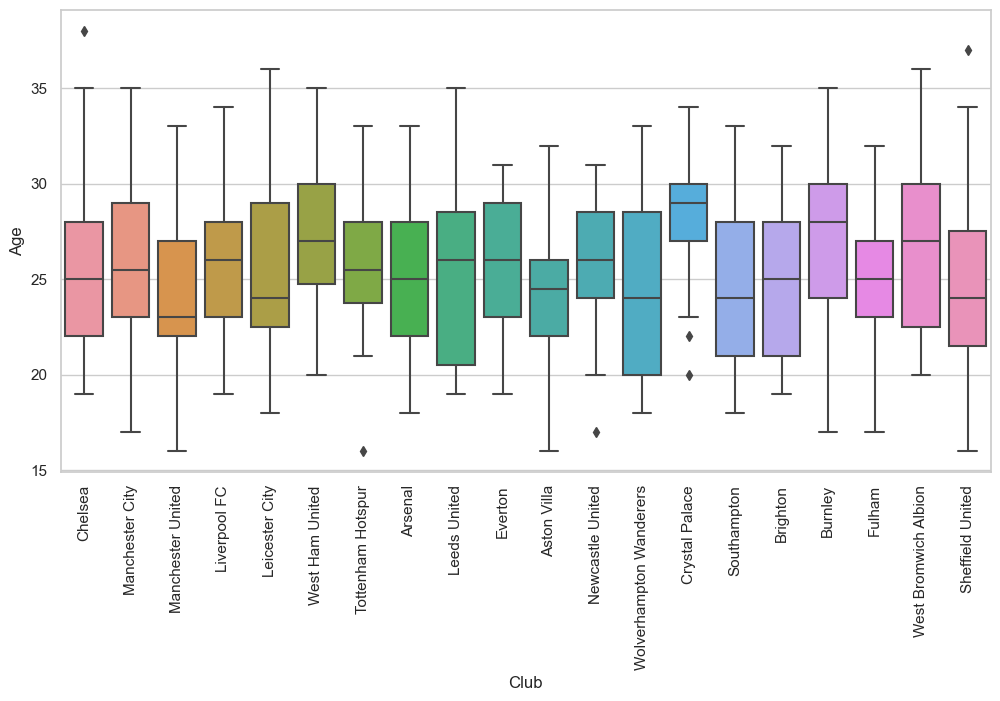

In [6]:
# Filter the dataset for players under the age of 20 in each club
player_under20 = epl_df[epl_df['Age'] < 20]
player_under20['Club'].value_counts().plot(kind='bar', color=sns.color_palette('cubehelix'))

# Filter the dataset for players under the age of 20 in Manchester United
player_under20[player_under20['Club'] == 'Manchester United']

# Filter the dataset for players under the age of 20 in Chelsea
player_under20[player_under20['Club'] == 'Chelsea']

# Create a box plot to visualize the average age of players in each club
plt.figure(figsize=(12, 6))
sns.boxplot(x='Club', y='Age', data=epl_df)
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Clubs vs Total Assists')

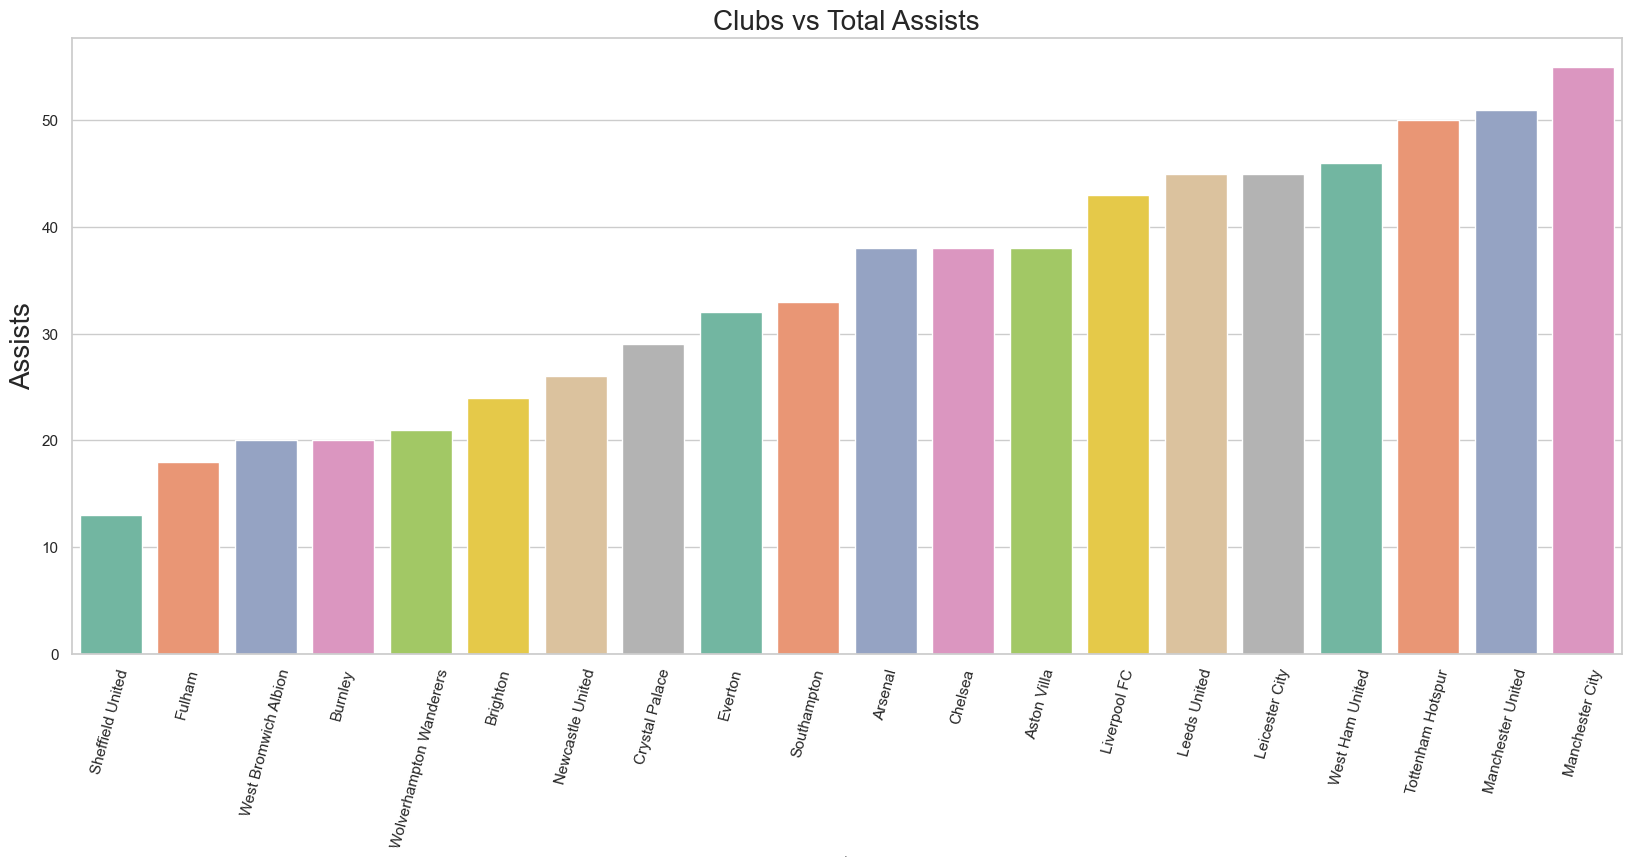

In [7]:

# Calculate the average age of players in each club and verify with the box plot
num_players = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum()) / num_players
data.sort_values(ascending=False)

# Create a bar plot to show the total number of assists from each club
Assists_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style='whitegrid', color_codes=True)
ax = sns.barplot(x='Club', y='Assists', data=Assists_by_clubs.sort_values(by='Assists'), palette='Set2')
ax.set_xlabel('Club', fontsize=0)
ax.set_ylabel('Assists', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20, 8)
plt.title('Clubs vs Total Assists', fontsize=20)



Text(0.5, 1.0, 'Clubs vs Total Goals')

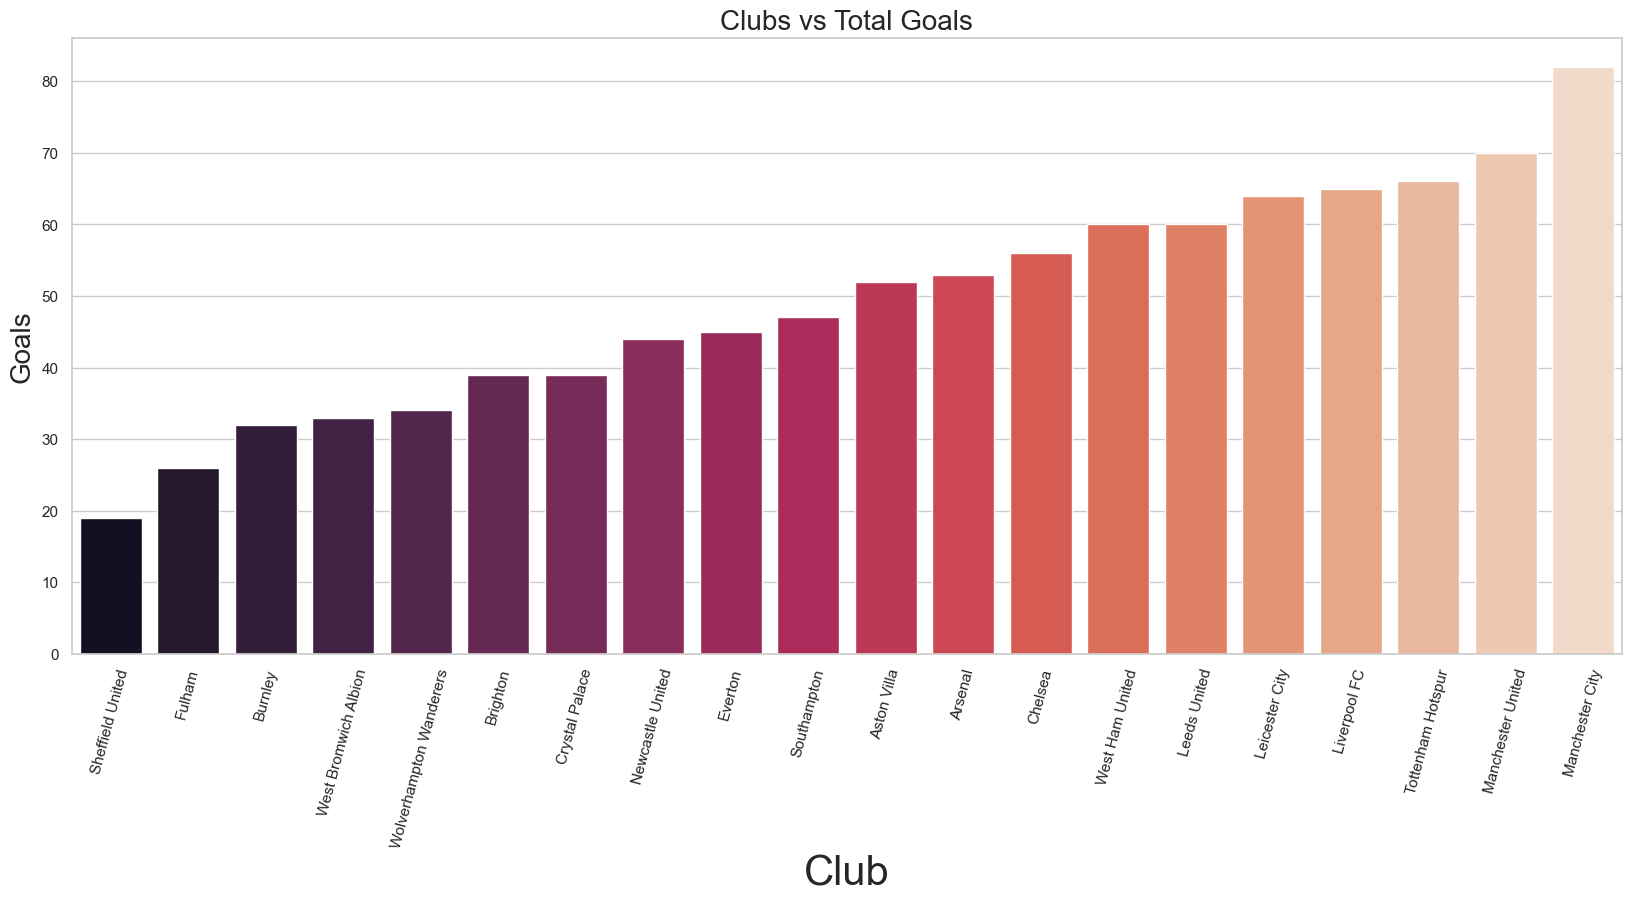

In [8]:
# Get the top 10 players with the most assists
top10assist = epl_df[['Name', 'Club', 'Assists', 'Matches']].nlargest(n=10, columns='Assists')

# Create a bar plot to show the total number of goals from each club
Goals_by_club = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Goals'].sum())
sns.set_theme(style='whitegrid', color_codes=True)
ax = sns.barplot(x='Club', y='Goals', data=Goals_by_club.sort_values(by='Goals'), palette='rocket')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Goals', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20, 8)
plt.title('Clubs vs Total Goals', fontsize=20)



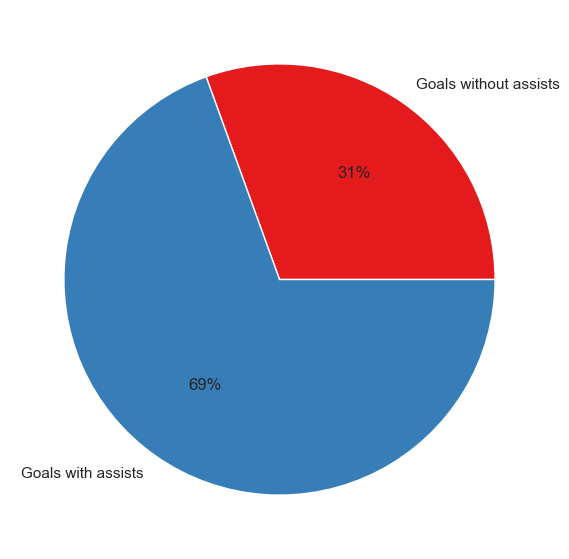

In [9]:
# Get the top 10 players with the most goals
top_10_goals = epl_df[['Name', 'Club', 'Goals', 'Matches']].nlargest(n=10, columns='Goals')

# Get the top 10 players with the highest goals per match ratio
goalpermatch = epl_df[['Name', 'Goalpermatch', 'Matches', 'Goals']].nlargest(n=10, columns='Goalpermatch')

# Create a pie chart to visualize goals with and without assists
plt.figure(figsize=(14, 7))
assists = epl_df['Assists'].sum()
data = [Total_goals - assists, assists]
labels = ['Goals without assists', 'Goals with assists']
color = sns.color_palette('Set1')
plt.pie(data, labels=labels, colors=color, autopct='%.0f%%')
plt.show()


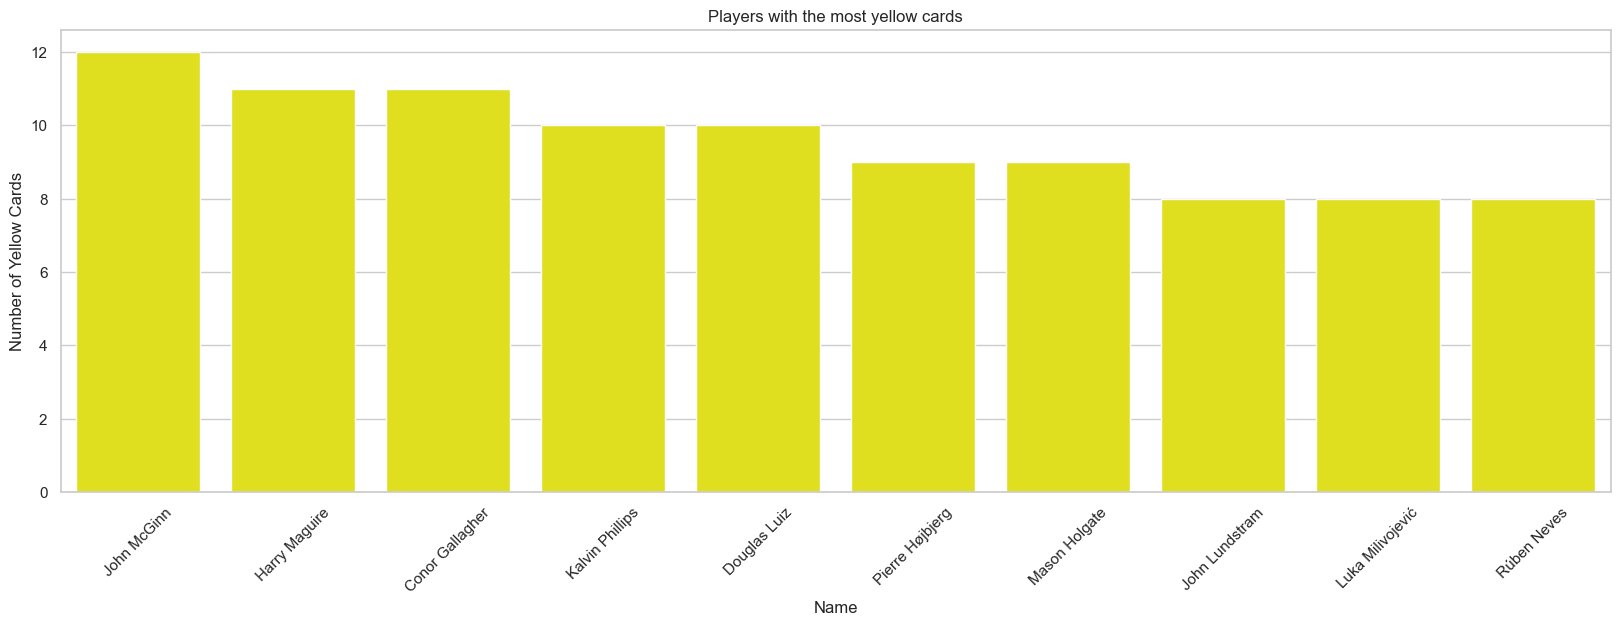

In [10]:

# Get the top 10 players with the most yellow cards
epl_yellow = epl_df.sort_values(by='Yellow_Cards', ascending=False)[:10]

# Create a bar plot to visualize the players with the most yellow cards
plt.figure(figsize=(20, 6))
plt.title('Players with the most yellow cards')
ax = plt.gca()  # Get the current axes
c = sns.barplot(x=epl_yellow['Name'], y=epl_yellow['Yellow_Cards'], label='Players', color='yellow')

# Set the label for the y-axis
ax.set_ylabel('Number of Yellow Cards')

# Rotate the x-axis labels for better readability
c.set_xticklabels(c.get_xticklabels(), rotation=45)

# Display the plot
plt.show()
